In [26]:
import os

import autograd.numpy as np
from minimc import (
    neg_log_normal,
    mixture,
    hamiltonian_monte_carlo,
    neg_log_mvnormal,
)
from minimc import neg_log_funnel, hamiltonian_monte_carlo, neg_log_normal
from minimc.minimc_slow import hamiltonian_monte_carlo as hmc_slow
from minimc.autograd_interface import AutogradPotential
import matplotlib.pyplot as plt
%matplotlib inline

neg_log_p = AutogradPotential(neg_log_funnel())

samples, positions, momentums, accepted, p_accepts = hmc_slow(
        1, neg_log_p, np.zeros(2), path_len=1000, step_size=0.01
    )

100%|██████████| 1/1 [01:18<00:00, 78.18s/it]


In [15]:
import pandas as pd
pd.DataFrame(positions[0], columns=['x', 'y']).to_csv('xy.csv')

In [27]:
print(positions[0][:,1].min(), positions[0][:,1].max())

-13.482555117577947 1721.253830445126


In [42]:
positions[0].shape

(100001, 2)

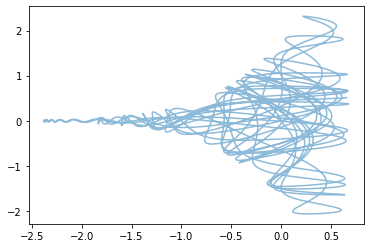

In [43]:
upto=8000
plt.plot(positions[0][:,0][:upto], positions[0][:,1][:upto], alpha=0.5)

In [2]:
###This is one way but Im not sure it's correct. It might just look right by accident.
#x = np.linspace(-3, 3, 30)
#y = np.linspace(-3, 3, 30)
#Z = np.zeros([30,30])
#
#for counta, a in enumerate(y):
#    for countb, b in enumerate(x):
#        Z[counta,countb] = neg_log_p(coords=np.array([a,b]))[0]
#        
#
#plt.figure(figsize=(10,10))        
#plt.contourf(x, y, np.log(Z.T+1), levels=100)
#plt.plot(positions[0][:,0], positions[0][:,1])

In [3]:
##This way seems correct. 
xx,yy = np.meshgrid(np.arange(-3,0.25,0.01), np.arange(-1,1,0.01))
Z = np.zeros(xx.shape)

for count, a in enumerate(zip(xx.ravel(), yy.ravel())):
    b = neg_log_p(coords=np.array([a[0],a[1]]))[0]
    Z.ravel()[count]=b

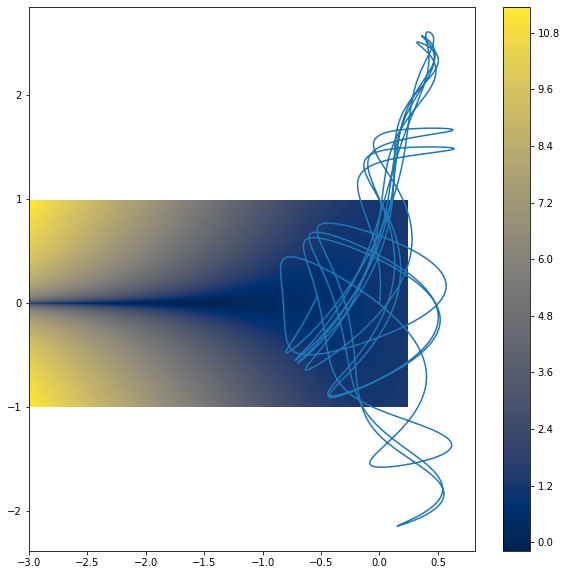

In [4]:
plt.figure(figsize=(10,10))
#cmap = RdGy
plt.contourf(xx, yy, np.log(Z+1), levels=200, cmap='cividis')
plt.plot(positions[0][:,0], positions[0][:,1])
plt.colorbar()

In [24]:
from matplotlib import animation, rc


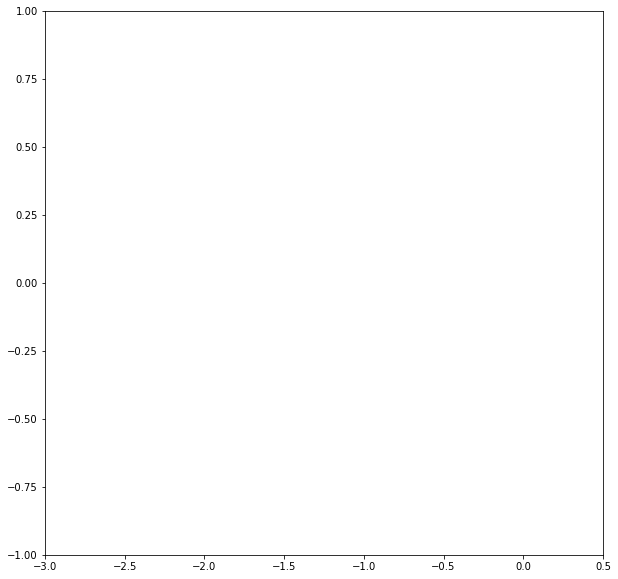

In [36]:
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)

ax.set_xlim(( -3, 0.5))
ax.set_ylim((-1, 1))
#ax.contourf(xx, yy, np.log(Z+1), levels=100)
line, = ax.plot([], [], lw=2)



# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    g = positions[0][:,0][:i*2]
    h = positions[0][:,1][:i*2]
    line.set_data(g, h)
    return (line,)

# call the animator. blit=True means only re-draw the parts that 
# have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=20, blit=True)



In [37]:
len(positions[0])

1001

In [38]:
anim


In [36]:
anim.save('./animation.mpg', writer='imagemagick', fps=20)